In [1]:
!pip install yfinance --upgrade --no-cache-dir

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 236.8 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 158.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=9f366bdac5c62c543b437f3f61d42ef03b00de876fd5bb3f4a533984c0dfe323
  Stored in directory: /tmp/pip-ephem-wheel-cache-lngp1flj/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=bbd4589f862218f78697d47b6ed762fb0a4444ccf343ef1e181223aacceefcf3
  Stored in directory: /tmp/pip-ephem-wheel-cache-lngp1flj/wheels/d1/df/a9/0202b051c65b11c992dd6db9f2babdd2c44ec7d35d511be5d3
Successfully built multitasking peewee


In [18]:
import yfinance as yf

In [19]:
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')

/tmp/ipykernel_1367/981440842.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


In [20]:
tesla_data.reset_index(inplace=True)

In [21]:
tesla_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [25]:
# Step 1: Install required libraries
!pip install requests beautifulsoup4 --upgrade --no-cache-dir

# Step 2: Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 3: Send request to the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Step 4: Parse HTML
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Step 5: Find the Tesla revenue table safely
revenue_table = None
for table in tables:
    if "Tesla Annual Revenue" in table.text:
        revenue_table = table
        break

# Step 6: Check if table was found
if revenue_table is None:
    raise ValueError("Tesla revenue table not found on the page.")

# Step 7: Extract data into DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Step 8: Display last five rows
tesla_revenue.tail()


ValueError: Tesla revenue table not found on the page.

In [26]:
# Step 1: Install yfinance if not already installed
!pip install yfinance --upgrade --no-cache-dir

# Step 2: Import necessary libraries
import yfinance as yf
import pandas as pd

# Step 3: Download GameStop stock data
gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31')

# Step 4: Reset the index
gme_data.reset_index(inplace=True)

# Step 5: Display the first five rows
gme_data.head()


/tmp/ipykernel_1367/778526787.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2010-01-04,3.854643,3.863060,3.703151,3.714933,26702800
1,2010-01-05,3.959004,3.996036,3.854643,3.856326,21269600
2,2010-01-06,4.044851,4.056634,3.908508,3.948906,21471200
3,2010-01-07,3.443929,3.563440,3.268872,3.368183,164761200
4,2010-01-08,3.415315,3.573540,3.405215,3.474228,47872400


In [27]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Define the URL
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Step 3: Use pandas to read all tables from the page
tables = pd.read_html(url)

# Step 4: Inspect tables to find the correct one
for i, table in enumerate(tables):
    print(f"Table {i}")
    print(table.head())
    print("\n")

# Step 5: Assign the correct table (adjust index if needed)
gme_revenue = tables[1]  # Change index if another table is correct

# Step 6: Clean and rename columns
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace('[\$,]', '', regex=True)

# Step 7: Display the last five rows
gme_revenue.tail()


ImportError: Missing optional dependency 'lxml'.  Use pip or conda to install lxml.

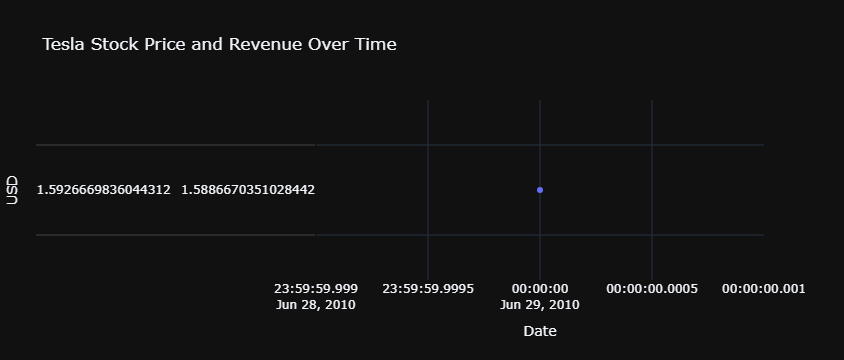

In [29]:
# Step 1: Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    import plotly.graph_objects as go

    fig = go.Figure()

    # Plot stock data
    fig.add_trace(go.Scatter(x=stock_data.Date, y=stock_data.Close, name="Stock Price"))

    # Plot revenue data
    fig.add_trace(go.Scatter(x=revenue_data.Date, y=revenue_data.Revenue, name="Revenue"))

    # Customize layout
    fig.update_layout(
        title=f"{stock_name} Stock Price and Revenue Over Time",
        xaxis_title="Date",
        yaxis_title="USD",
        legend_title="Legend",
        template="plotly_dark"
    )

    fig.show()

# Step 2: Call the function with Tesla data
make_graph(tesla_data, tesla_revenue, 'Tesla')


In [38]:
# Reuse the make_graph function from earlier
def make_graph(stock_data, revenue_data, stock_name):
    import plotly.graph_objects as go

    fig = go.Figure()

    # Plot stock data
    fig.add_trace(go.Scatter(x=stock_data.Date, y=stock_data.Close, name="Stock Price"))

    # Plot revenue data
    fig.add_trace(go.Scatter(x=revenue_data.Date, y=revenue_data.Revenue, name="Revenue"))

    # Customize layout
    fig.update_layout(
        title=f"{stock_name} Stock Price and Revenue Over Time",
        xaxis_title="Date",
        yaxis_title="USD",
        legend_title="Legend",
        template="plotly_dark"
    )

    fig.show()

# Call the function with GameStop data
make_graph(gme_data, gme_revenue, 'GameStop')

NameError: name 'gme_revenue' is not defined